In [1]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pda
import glob
import timeit
import time
from multiprocessing import Pool
import numpy as np
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

In [2]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
significant_cores3={}
PAPERS_TOGETHER=3

for gsize in range(2,10):
    print(gsize,end='\r')
#     with open(path_career+'significant_cores3_size'+str(gsize)+'_v2.pkl', 'rb') as f:
    with open(path_career+'significant_cores3_size'+str(gsize)+'(whole).pkl', 'rb') as f:
        significant_cores3[gsize]=pickle.load(f) 
    significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>PAPERS_TOGETHER]
    significant_cores3[gsize]['size']=gsize

# calc formation of cores

In [49]:
# dict_pairs_firstpubtogether
with open(path_career+'dict_pairs_firstpubtogether.pkl', 'rb') as f:
    dict_pairs_firstpubtogether=pickle.load(f) 

In [3]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 
auth_to_firstpubyear=dict_firstpub

with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubdate=pickle.load(f) 
paper_to_pubyear=dict_pubdate

In [51]:
for gsize in range(2,10):
    t_ic = time.time();

    print(gsize,end='\r')
    group=list(significant_cores3[gsize]['group'])

    Age1=[];Age2=[]
    sfirstpubtogether=[]
    smem_first=[]
    for it_auth in range(len(group)):
#         print(it_auth/len(group),end='\r')

        mem_first=[]
        firstpubtogether=[]
        a=group[it_auth]
        for ii in range(len(a)):
            try:
                mem_first.append(int(dict_firstpub[a[ii]]))
            except:
                mem_first.append(np.nan)
            for ii2 in range(ii+1,len(a)):
                if a[ii2] in dict_pairs_firstpubtogether[a[ii]].keys():
                    firstpubtogether.append(dict_pairs_firstpubtogether[a[ii]][a[ii2]]['first_year_together']);
                else:
                    firstpubtogether.append(np.nan)
#             ages=[firstpubtogether-firstA1,firstpubtogether-firstA2];ages=sorted(ages)
#             Age1.append(ages[0]);Age2.append(ages[1]);

        sfirstpubtogether.append(firstpubtogether)
        smem_first.append(mem_first)

        if (it_auth+1)%100==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(gsize)+'--- ',str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

    

#     significant_cores3[gsize]['sfirstpubtogether']=sfirstpubtogether
    significant_cores3[gsize]['member_first_pub']=smem_first
    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(sfirstpubtogether, f)  
    with open(path_career+'smember_first_pub'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(smem_first, f)

# Auth to cores

In [12]:
dictauthcores={}
for gsize in range(2,10):
    print(gsize,end='\r')
    significant_cores3[gsize]

    groups=list(significant_cores3[gsize]['group'])
    t_ic = time.time();
    
    for it in range(len(groups)):
        for auth in groups[it]:
            try:
                dictauthcores[auth].append([gsize,it,groups[it]])
            except:
                dictauthcores[auth]=[[gsize,it,groups[it]]]
                
        if (it+1)%100==0:
            t_oc = time.time();
            frac=(it/len(groups))
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')


In [13]:
with open(path_career+'dictauthcores.pkl', 'wb') as f:
    pickle.dump(dictauthcores, f)  
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_auth_to_paper(whole).pkl', 'rb') as f:
    dict_auth_to_paper=pickle.load(f) 
    

In [14]:
len(dictauthcores)/len(dict_auth_to_paper)

0.4187363125436461

4000926

# Papers shared

In [232]:
t_ic = time.time();

for gsize in range(2,10):
    t_ic = time.time();
    path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
    
    print(gsize)
    papers_shared=[]
    ind_papers_shared=[0]
    ind_=0
    it=0

    for group in significant_cores3[gsize]['group']:
        
        for auth in group:
            papersinquestion=dict_auth_to_paper[auth]
            y=[]
            for p in papersinquestion:
                pauths=dict_paper_to_auth[p]
                if len(set(pauths).intersection(group))==len(group):
                    y.append(p)

        papers_shared.append(y)
        ind_=ind_+len(y)
        
        it=it+1
        if it%100==0:
            t_oc = time.time();
            frac=(it/len(significant_cores3[gsize]['group']))
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

    papers_shared=[list(x) for x in papers_shared]    
    
    if len(papers_shared)>0:
        A=np.concatenate(papers_shared)
    else:
        A=[]
    B=[len(x) for x in papers_shared]
    C=np.cumsum(B)
    C=np.insert(C,0,0)
    print('\n',len(C),'\n')
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(A, f)  
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_ind.pkl', 'wb') as f:
        pickle.dump(C, f)    

2
0.9998544490086361109.93, time estimate: 0.036
 247337 

3
0.999975728744448217.39, time estimate: 0.0666
 329609 

4
0.9997217701516543221.32, time estimate: 0.066
 262374 

5
0.9992189393735356119.17, time estimate: 0.034
 111388 

6
0.999257694284245944.41, time estimate: 0.011
 35027 

7
0.993748998236896919.09, time estimate: 0.011
 12479 

8
0.9909909909909916.8, time estimate: 0.0.00
 4441 

9
0.9575923392612862.31, time estimate: 0.000
 1463 



# pub years + sorting papers

In [233]:
import pickle
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubyear=pickle.load(f) 
paper_to_pubyear=dict_pubyear;

In [234]:
t_ic = time.time();
for gsize in range(2,10):

    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_ind.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    pub_years=[paper_to_pubyear[x]  if x in paper_to_pubyear.keys() else 0 for x in papers_by_team]
    pub_years=np.array(pub_years)


    for n in range(len(I)-1):

        a=papers_by_team[I[n]:I[n+1]]
        b=pub_years[I[n]:I[n+1]]
        z=sorted(zip(b,a))
        zpapers = [x for _,x in z]
        zyears=[_ for _,x in z]
        papers_by_team[I[n]:I[n+1]]=zpapers
        pub_years[I[n]:I[n+1]]=zyears

        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(papers_by_team, f)  
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_years, f)  
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'wb') as f:
        pickle.dump(I, f)  

# GeoDiversity: Rao stirling diverisity 

In [211]:
def calculate_rao_stirling(team_affiliations):
    """
    Calculate the Rao-Stirling diversity for a single team based on their affiliations.
    """
    
    # Function to calculate the Jaccard similarity between two sets
    def jaccard_similarity(set1, set2):
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union else 1
    
    # Ensure all affiliations are in set form for consistency
    affiliation_sets = [set(aff) if isinstance(aff, list) else set([aff]) for aff in team_affiliations]
    
    # Calculate the pairwise Jaccard similarities for each unique pair of affiliations
    pairwise_similarities = [jaccard_similarity(pair[0], pair[1]) for pair in itertools.combinations(affiliation_sets, 2)]
    
    # Calculate the Rao-Stirling diversity
    # Note: Assuming equal weight for each affiliation here (pi = 1/n for all i)
    # For a different distribution of weights, we would need to adjust the calculation.
    n = len(team_affiliations)
    pi = 1 / n
    diversity = sum((1 - similarity) * pi * pi for similarity in pairwise_similarities)
    
    return diversity

# # Example of how to use the function with a team input
# team_input = ["U30", "U31", "U32", "U33"] # Example team with no shared affiliations
# rao_stirling_diversity_score = calculate_rao_stirling(team_input)
# rao_stirling_diversity_score



In [143]:
with open(path_career+'country_to_continent.pkl', 'rb') as f:
    country_to_continent=pickle.load(f) 

In [3]:
with open(path_career+'dict_paper_auth_geo.pkl', 'rb') as f:
    dict_paper_auth_geo=pickle.load(f) 

In [157]:
geodiversities_countries={}
geodiversities_continents={}
for gsize in range(2,10):
    
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])

    geodiversities_countries[gsize]=[]
    geodiversities_continents[gsize]=[]
    for n in range(len(I)-1):
        print(round(n/len(papers_by_team),3),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
        teamcore=list(teamcores[n])
        countries_coresizexPapers=[[dict_paper_auth_geo[paper][auth] for auth in teamcore] for paper in papersbyteam]
        countries_coresizexPapers

        continents=[[[country_to_continent.get(z) for z in y] for y in x] for x in countries_coresizexPapers]
        geodiversitycountries=[rao_stirling_diversity(x) for x in countries_coresizexPapers if False not in [len(y)>0 for y in x]]
        geodiversitycontinents=[rao_stirling_diversity(x) for x in continents if False not in [len(y)>0 for y in x]]
        geodiversities_countries[gsize].append(np.mean(geodiversitycountries))
        geodiversities_continents[gsize].append(np.mean(geodiversitycontinents))



2
3.078
4.127
5.182
6.202
7.201
8.193
9.185


In [243]:

with open(path_career+'geodiversities_countries.pkl', 'wb') as f:
    pickle.dump(geodiversities_countries, f) 
with open(path_career+'geodiversities_continents.pkl', 'wb') as f:
    pickle.dump(geodiversities_continents, f) 

In [160]:

for gsize in range(2,8):
    print(gsize, np.count_nonzero(~np.isnan(geodiversities_countries[gsize]))/len(geodiversities_countries[gsize]))


2 0.8186596370928615
3 0.8532286837698114
4 0.842121712218864
5 0.7677377072728415
6 0.686861188831154
7 0.6390447187049206


In [169]:
for gsize in range(2,8):
    fgeodivNOTnan=np.array(geodiversities_countries[gsize])[~np.isnan(geodiversities_countries[gsize])]
    print(gsize, round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1),'% cores: all members same country')

2 79.0 % cores: all members same country
3 78.4 % cores: all members same country
4 78.2 % cores: all members same country
5 77.3 % cores: all members same country
6 77.9 % cores: all members same country
7 78.0 % cores: all members same country


In [171]:
for gsize in range(2,8):
    fgeodivNOTnan=np.array(geodiversities_continents[gsize])[~np.isnan(geodiversities_continents[gsize])]
    print(gsize, round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1),'% cores: all members same continent')

2 85.4 % cores: all members same continent
3 85.1 % cores: all members same continent
4 84.8 % cores: all members same continent
5 84.3 % cores: all members same continent
6 84.7 % cores: all members same continent
7 84.0 % cores: all members same continent


[0.125, 0.0, 0.0, 0.0]

In [125]:
rao_stirling_diversity(countries_coresizexPapers[0])

0.125

In [212]:

# Define the teams
teams = {
    'A': ['U1', 'U1', 'U1'],
    'B': ['U2', 'U2', ['U2', 'U3']],
    'C': ['U4', 'U5', ['U4', 'U5', 'U6']],
    'D': ['U4', 'U5', ['U5', 'U6']],
    'E': ['U7', 'U8', 'U9'],
    'F': ['U10', 'U10', ['U10', 'U11']],
    'G': ['U12', ['U12', 'U13'], ['U12', 'U13']],
    'H': ['U14', ['U14', 'U15'], ['U14', 'U15', 'U16']],
    'I': ['U17', 'U17', 'U17'],
    'J': ['U18', 'U19', 'U20']
}

teams.items()
# Calculate Rao-Stirling diversity for each team
rao_stirling_scores = {team+str(affiliations): calculate_rao_stirling(affiliations) for team, affiliations in teams.items()}

# Sort teams by increasing order of diversity
sorted_teams_by_diversity = sorted(rao_stirling_scores.items(), key=lambda item: item[1])

sorted_teams_by_diversity, 
# rao_stirling_scores


([("A['U1', 'U1', 'U1']", 0.0),
  ("I['U17', 'U17', 'U17']", 0.0),
  ("B['U2', 'U2', ['U2', 'U3']]", 0.1111111111111111),
  ("F['U10', 'U10', ['U10', 'U11']]", 0.1111111111111111),
  ("G['U12', ['U12', 'U13'], ['U12', 'U13']]", 0.1111111111111111),
  ("H['U14', ['U14', 'U15'], ['U14', 'U15', 'U16']]", 0.16666666666666666),
  ("C['U4', 'U5', ['U4', 'U5', 'U6']]", 0.25925925925925924),
  ("D['U4', 'U5', ['U5', 'U6']]", 0.2777777777777778),
  ("E['U7', 'U8', 'U9']", 0.3333333333333333),
  ("J['U18', 'U19', 'U20']", 0.3333333333333333)],)

# uniques authors from all cores [upload to openalex]

In [183]:
maxS=8
Uauthor=np.concatenate(list(significant_cores3[2]['group']))

for gsize in range(2,10):
    print(gsize,end='\r')
    Uauthor=np.concatenate([Uauthor,np.concatenate(list(significant_cores3[gsize]['group']))])

Uauthor=np.unique(Uauthor)

 
# save the dataframe as a csv file


In [184]:
import pandas as pd
DF1 = pd.DataFrame(Uauthor)
DF1.to_csv("UniqueAuthorsAllCoreSizes.csv")

In [185]:
DF1

,0
0,https://openalex.org/A1000047157
1,https://openalex.org/A100026995
2,https://openalex.org/A10002840
3,https://openalex.org/A100028492
4,https://openalex.org/A100040874
...,...
1675328,https://openalex.org/A999822179
1675329,https://openalex.org/A999823350
1675330,https://openalex.org/A99986939
1675331,https://openalex.org/A99993060


# uniques papers from all cores [upload to openalex]

In [3]:
maxS=8
UPapers=[]
for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    UPapers.append(papers_by_team)


UPapers=np.concatenate(UPapers)
UPapers=np.unique(UPapers)

DF = pd.DataFrame(UPapers)
 
# save the dataframe as a csv file


In [4]:
DF.to_csv("UniquePapersAllCoreSizes.csv")

8039531

0.9121411435567572

# c5 normalized

In [235]:
with open(path_career+'dict_c5_norm.pkl', 'rb') as f:
    dict_c5_norm=pickle.load(f) 
paper_to_c5norm=dict_c5_norm

In [236]:
with open(path_career+'dict_paper_to_discidiversity.pkl', 'rb') as f:
    dict_paper_to_discidiversity=pickle.load(f) 
    

In [237]:

with open(path_career+'dict_papersteamsizes.pkl', 'rb') as f:
    dict_papersteamsizes=pickle.load(f) 
    

In [238]:
t_ic = time.time();
for gsize in range(2,10):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    c5=[paper_to_c5norm[x]  if x in paper_to_c5norm.keys() else 0 for x in papers_by_team]
    c5=np.array(c5)

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5, f)  
    dict_papersteamsizes    
        
    pub_diversity=[dict_paper_to_discidiversity[x]  if x in dict_paper_to_discidiversity.keys() else np.nan for x in papers_by_team]
    pub_diversity=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_diversity, f)  

    
    teamsizes=[dict_papersteamsizes[x]  if x in dict_papersteamsizes.keys() else np.nan for x in papers_by_team]
    teamsizes=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(teamsizes, f)  

     

In [240]:
t_ic = time.time();
for gsize in range(2,10):
    print(gsize,end='\r')
    
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    
    c5=[paper_to_c5norm[x]  if x in paper_to_c5norm.keys() else 0 for x in papers_by_team]
    c5=np.array(c5)

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5, f)  
    dict_papersteamsizes    
        
    pub_diversity=[dict_paper_to_discidiversity[x]  if x in dict_paper_to_discidiversity.keys() else np.nan for x in papers_by_team]
    pub_diversity=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_diversity, f)  
    
    teamsizes=[dict_papersteamsizes[x]  if x in dict_papersteamsizes.keys() else np.nan for x in papers_by_team]
    teamsizes=np.array(teamsizes)
    
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(teamsizes, f)  


In [45]:

for gsize in range(2,10):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pubyears =pickle.load(f) 
    c5_first=[c5[I[n]] for n in range(len(I)-1)]
    significant_cores3[gsize]['c5_first']=c5_first
    
    n_2018=[np.sum(pubyears[I[n]:I[n+1]]<=2018) for n in range(len(I)-1)]
    c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
    half=I[0:-1] + np.rint((np.array(n_2018)/2+.5)).astype('int')
    c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]
    c5_half2=[np.nanmean(c5[half[n]:I[n+1]]) for n in range(len(I)-1)]
    
   
    with open(path_career+'significant_cores(w2018)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(n_2018, f)  
    with open(path_career+'significant_cores(c5_mean)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_mean, f)  
    with open(path_career+'significant_cores(c5_half1)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_half1, f)  
    with open(path_career+'significant_cores(c5_half2)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_half2, f)  
    with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_first, f)  
        


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


<ipython-input-45-7565cd485080>:14: RuntimeWarning: Mean of empty slice
  c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
<ipython-input-45-7565cd485080>:16: RuntimeWarning: Mean of empty slice
  c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]


# work count union 

In [241]:
with open(path_career+'dict_workcounts_per_year_for_authors.pkl', 'rb') as f:
        dict_workcounts_per_year_for_authors=pickle.load(f)

In [242]:
len(dict_workcounts_per_year_for_authors)

4000926

In [298]:
z=('https://openalex.org/A3050865049', 'https://openalex.org/A3052319308')

In [299]:
for x in z: 
    print(dict_workcounts_per_year_for_authors[x],'\n')

{2002: 1, 2003: 2, 2005: 2, 2006: 2, 2007: 3, 2009: 1, 2010: 2, 2012: 2, 2013: 1, 2014: 2, 2015: 2, 2017: 1, 2019: 1} 

{2001: 2, 2002: 1, 2003: 2, 2006: 2, 2007: 2, 2009: 1, 2010: 2, 2011: 1, 2012: 2, 2013: 2, 2014: 2, 2015: 2, 2019: 2} 



In [ ]:
first_paper_pubyear 2002.003
last_paper_pubyear 2019.419

In [300]:
for gsize in range(2,3):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    

In [302]:
papers_by_team[I[0]:I[1]]

array(['https://openalex.org/W951794421',
       'https://openalex.org/W2267839044',
       'https://openalex.org/W816716612',
       'https://openalex.org/W1000008938',
       'https://openalex.org/W2290065055',
       'https://openalex.org/W3029631223',
       'https://openalex.org/W71586038',
       'https://openalex.org/W1524237555',
       'https://openalex.org/W989279461',
       'https://openalex.org/W864327006',
       'https://openalex.org/W63928668',
       'https://openalex.org/W2256192536',
       'https://openalex.org/W989261951',
       'https://openalex.org/W2277072878',
       'https://openalex.org/W2340440295',
       'https://openalex.org/W2972353304'], dtype='<U32')

In [303]:

scientist='https://openalex.org/A3050865049' # 



In [308]:
# list(significant_cores3[size].iloc[ind_Parisi,0])[1]
# uas=[]
import pandas as pd
dfshow=pd.DataFrame()
it=0;ind_Parisi=[]
for gsize in range(2,10):
    all_=list(significant_cores3[gsize]['group'])
    print(gsize,it)
    for it1 in range(len(all_)):
        x=all_[it1]
        if scientist in x:
            ind_Parisi.append([gsize,it])
            it=it+1
#             print(x)
#             print(significant_cores3[gsize].iloc[it1:it1+1])
            dfshow=pd.concat([dfshow,significant_cores3[gsize].iloc[it1:it1+1]])


2 0
3 1
4 1
5 1
6 1
7 1
8 1
9 1


In [309]:
dfshow

,group,pvalue,w,fdr,ni,N,size,first_paper_pubyear,last_paper_pubyear,core_diversity,member_first_pub
33,"(https://openalex.org/A3050865049, https://ope...",1.970952e-28,16,True,"(22, 21)",3627,2,2019.419,2019.419,0.399983,"[2002, 2001]"


In [311]:
# -----------------------------
for gsize in range(2,10):

    
    with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
        x=pickle.load(f)

    significant_cores3[gsize]['first_paper_pubyear']=x
    with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
        y=pickle.load(f)
    significant_cores3[gsize]['last_paper_pubyear']=y
# -----------------------------

In [312]:
import os
import json

# List all the JSON files in the current directory
# names=path_career+'2authors_papersgrouped/*'
# json_files=sorted(glob.glob(names))

def calc_workcount_during_active_period(significant_cores3_sample2):
    t_ic = time.time();
    count_NOTFOUND=0
    group=list(significant_cores3_sample2['group'])
    from_=list(significant_cores3_sample2['first_paper_pubyear'])
    to_=list(significant_cores3_sample2['last_paper_pubyear'])
    wcUNION=[]
    for it_auth in range(len(group)):
        for it_member in range(len(group[it_auth])):
            sum_count=0
            if group[it_auth][it_member] in dict_workcounts_per_year_for_authors.keys():
                for year in dict_workcounts_per_year_for_authors[group[it_auth][it_member]].keys():
                    if (year>=from_[it_auth]) and (year<=to_[it_auth]):
                        sum_count+=dict_workcounts_per_year_for_authors[group[it_auth][it_member]][year]
            else:
                count_NOTFOUND+=1
        wcUNION.append(sum_count) 


        if (it_auth+1)%10000==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')
    
    return wcUNION



In [313]:
json_files=[significant_cores3[k] for k in significant_cores3.keys()]
# Create a pool of workers to process the files concurrently
with Pool() as pool:
    # Apply the processing function to each JSON file concurrently
    results = pool.map(calc_workcount_during_active_period, json_files)


work_counts_UNION={}
for i,result in zip(range(2,10),results):
    work_counts_UNION[i]=result
    

In [314]:

# with open(path_career+'work_counts_UNION.pkl', 'wb') as f:
#     pickle.dump(work_counts_UNION, f)  

# Concept diversity : cosine similarity

In [216]:
# dict_author_concepts

In [217]:
import math

def cosine_dic(dic1,dic2):
    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)



False

In [228]:
cosine_diversity={}
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    cosine_diversity[gsize]=[]
    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:
            cosine_diversity[gsize].append(1-np.mean([[cosine_dic(dict_author_concepts[a1],dict_author_concepts[a2]) for a1 in core] for a2 in core]))
        else:
            cosine_diversity[gsize].append(np.nan)
        print(it/len(cores),end='\r')
    
with open(path_career+'dict_core_cosine_diversity.pkl', 'wb') as f:
    pickle.dump(cosine_diversity, f) 

2
3.09999595691690667456
4.09999696609305697666
5.09999618863221446456
6.09999102229164983656
7.09997144978016333554
8.09991985895175514454
9.09977477477477475656


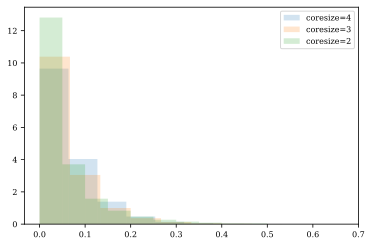

In [241]:
for gsize in [4,3,2]:
    plt.hist(cosine_diversity[gsize],density=True,bins=10,alpha=.2,label='coresize='+str(gsize));
plt.legend()

In [247]:
monodisciplinarity={}
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    monodisciplinarity[gsize]=[]
    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:
            monodisciplinarity[gsize].append(np.mean([np.max(list(dict_author_concepts[a].values()))/np.sum(list(dict_author_concepts[a].values())) for a in core]))
        else:
            monodisciplinarity[gsize].append(np.nan)
        print(it/len(cores),end='\r')
    
# with open(path_career+'dict_monodisciplinarity.pkl', 'wb') as f:
#     pickle.dump(monodisciplinarity, f) 

2
3.09999595691690667456
4.09999696609305697666
5.09999618863221446456
6.09999102229164983656
7.09997144978016333554
8.09991985895175514454
9.09977477477477475656


In [253]:
monodisciplinarity[3]

[0.5218985774101602,
 0.33989682533596116,
 0.35211176613098605,
 0.15282953084292308,
 1.0,
 0.20963733715162491,
 0.23475110641335487,
 0.25067046135007304,
 0.3921221166526694,
 0.25136468508256826,
 0.2623403135196745,
 0.2526811862549016,
 1.0,
 0.2024990545572771,
 0.42957316160208353,
 0.4269787354928059,
 0.21986614884885655,
 0.20054278439844841,
 0.8887530562347189,
 0.38059120858982015,
 0.3626809060427485,
 0.36039782866291886,
 0.3323465528779352,
 0.33476829949591047,
 0.3816096930104093,
 0.24461791987039724,
 0.25406329593876326,
 0.28509958396412466,
 0.6082291051586236,
 0.3351879992805091,
 0.29931816141392587,
 0.3163311490570508,
 0.23373232121003648,
 0.1891945055746309,
 0.2556441772318379,
 0.24963400717686957,
 0.31231480669526784,
 0.2446891823624954,
 0.28722503482888967,
 0.8224492143341116,
 0.28426492392303687,
 1.0,
 0.2592673178852533,
 0.26282472198084056,
 1.0,
 1.0,
 0.17899057503100724,
 0.42004184467907574,
 0.5271201559423468,
 1.0,
 0.335027831919

In [248]:
with open(path_career+'dict_monodisciplinarity.pkl', 'wb') as f:
    pickle.dump(monodisciplinarity, f) 

In [252]:
dominant_discipline={}
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    dominant_discipline[gsize]=[]
    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:

            dominant_discipline[gsize].append([max(zip(dict_author_concepts[a].values(), dict_author_concepts[a].keys()))[1] for a in core])
        else:
            dominant_discipline[gsize].append(np.nan)
        print(it/len(cores),end='\r')
    
# with open(path_career+'dict_dominant_discipline.pkl', 'wb') as f:
#     pickle.dump(dominant_discipline, f) 

2


KeyError: 2

# Paper disciplinary diversity of cores

In [250]:
t_ic = time.time();
core_diversity={}
for gsize in range(2,10):
    print(gsize,end='\r')
#     cores=significant_cores3[gsize]
#     group=list(cores['group'])
    
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_diversity=pickle.load(f) 

    core_diversity[gsize]=[]
    for n in range(len(I)-1):

        a=pub_diversity[I[n]:I[n+1]]
        core_diversity[gsize].append(np.nanmean(a))
        
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    significant_cores3[gsize]['core_diversity']=core_diversity[gsize]
with open(path_career+'dict_significant_core_diversity.pkl', 'wb') as f:
    pickle.dump(core_diversity, f) 


# correlation impact vs  teamsizes

In [ ]:
corrimpactteamsize={}
numpapers={}
from scipy import stats


for gsize in range(2,10):
    t_ic = time.time();
    print(gsize,end='\r')
    corrimpactteamsize[gsize]=[]
    numpapers[gsize]=[]
    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        teamsizes=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        corrimpactteamsize[gsize].append(stats.spearmanr(c5[I[n]:I[n+1]],teamsizes[I[n]:I[n+1]]))
        numpapers[gsize].append(I[n+1]-I[n])
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')   
#         a=papers_by_team[I[n]:I[n+1]]

with open(path_career+'corrimpactteamsize.pkl', 'wb') as f:
    pickle.dump(corrimpactteamsize, f)  
with open(path_career+'corrimpactteamsizenumpapers.pkl', 'wb') as f:
    pickle.dump(numpapers, f)  




/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


# calc formation of cores

In [ ]:
# dict_pairs_firstpubtogether
with open(path_career+'dict_pairs_firstpubtogether.pkl', 'rb') as f:
    dict_pairs_firstpubtogether=pickle.load(f) 

In [ ]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 
auth_to_firstpubyear=dict_firstpub

with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubdate=pickle.load(f) 
paper_to_pubyear=dict_pubdate

In [ ]:
for gsize in range(2,10):
    t_ic = time.time();


    print(gsize,end='\r')
    group=list(significant_cores3[gsize]['group'])

    Age1=[];Age2=[]
    sfirstpubtogether=[]
    smem_first=[]
    for it_auth in range(len(group)):
#         print(it_auth/len(group),end='\r')

        mem_first=[]
        firstpubtogether=[]
        a=group[it_auth]
        for ii in range(len(a)):
            try:
                mem_first.append(int(dict_firstpub[a[ii]]))
            except:
                mem_first.append(np.nan)
            for ii2 in range(ii+1,len(a)):
                if a[ii2] in dict_pairs_firstpubtogether[a[ii]].keys():
                    firstpubtogether.append(dict_pairs_firstpubtogether[a[ii]][a[ii2]]['first_year_together']);
                else:
                    firstpubtogether.append(np.nan)
#             ages=[firstpubtogether-firstA1,firstpubtogether-firstA2];ages=sorted(ages)
#             Age1.append(ages[0]);Age2.append(ages[1]);

        sfirstpubtogether.append(firstpubtogether)
        smem_first.append(mem_first)

        if (it_auth+1)%100==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(gsize)+'--- ',str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

    

#     significant_cores3[gsize]['sfirstpubtogether']=sfirstpubtogether
    significant_cores3[gsize]['member_first_pub']=smem_first
    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(sfirstpubtogether, f)  
    with open(path_career+'smember_first_pub'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(smem_first, f)  


# Non-core members identification

In [ ]:
with open(path_career+'dict_paper_to_auth(whole).pkl', 'rb') as f:
        dict_paper_to_auth=pickle.load(f)

In [259]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    NONCORES=[]
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    for n in range(len(I)-1):
        papers=papers_by_team[I[n]:I[n+1]]
        allauths=[dict_paper_to_auth[paper] for paper in papers]
        core=cores[n]
        for team in allauths: 
            noncores=[a for a in team if a not in core]   
            NONCORES.append(noncores)
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES, f)

2
3s 2,0.999846363463614462.29, time estimate: 0.0229
4s 3,0.999969661022605556.76, time estimate: 0.02264
5s 4,0.999714148505568438.02, time estimate: 0.01118
6s 5,0.999200991130103716.47, time estimate: 0.0119
7s 6,0.99920061666714246.0, time estimate: 0.00001
8s 7,0.99358922990624242.39, time estimate: 0.0001
9s 8,0.99054267056969150.97, time estimate: 0.000


In [260]:
for gsize in range(2,10):
    print(gsize)
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES=pickle.load(f)
    num_noncore=[len(x) for x in NONCORES]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(num_noncore, f)

2
3
4
5
6
7
8
9


In [59]:
for gsize in range(2,10):
    print(gsize)
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    print(np.mean(num_noncore))

2
0.8518307520747852
3
1.2047351481307642
4
1.4006176420240528
5
1.1817391525288383
6
0.8630235917188253
7
0.567701978470045
8
0.2674689764304156
9
0.0


In [262]:

for gsize in range(2,10):
    NONCORES_COMBINED=[]
    NONCORES_COMBINED_UNIQUE=[]
    t_ic = time.time();
    print(gsize)

    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(I[-1],len(NONCORES))
    for n in range(len(I)-1):
        noncoremembers=NONCORES[I[n]:I[n+1]]
        
#         allauths=[dict_paper_to_auth[paper] for paper in papers]
        y=[]        
        for x in noncoremembers: 
            y=y+x
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')            
        NONCORES_COMBINED.append(y)
        NONCORES_COMBINED_UNIQUE.append(set(y))

    with open(path_career+'significant_cores(NONCORES_COMBINED)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES_COMBINED, f)
    with open(path_career+'significant_cores(NONCORES_COMBINED_UNIQUE)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES_COMBINED_UNIQUE, f)


2
3175389 3175389
3s 2,0.99984636346361442.17, time estimate: 0.00014
2597131 2597131
4s 3,0.99996966102260552.95, time estimate: 0.001156
1442907 1442907
5s 4,0.99971414850556841.72, time estimate: 0.000161
551004 551004
6s 5,0.99920099113010370.69, time estimate: 0.00012
174468 174468
7s 6,0.99920061666714240.18, time estimate: 0.0001
64747 64747
8s 7,0.99358922990624240.05, time estimate: 0.000
24014 24014
9s 8,0.99054267056969150.02, time estimate: 0.000
9871 9871


In [263]:

for gsize in range(2,10):
    t_ic = time.time();
    print(gsize)

    with open(path_career+'significant_cores(NONCORES_COMBINED)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES_COMBINED=pickle.load(f)
    with open(path_career+'significant_cores(NONCORES_COMBINED_UNIQUE)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES_COMBINED_UNIQUE=pickle.load(f) 
    nunique=[len(x) for x in NONCORES_COMBINED_UNIQUE]
    n=[len(x) for x in NONCORES_COMBINED]
    print(gsize,'---',np.mean(n),'--',np.mean(nunique),'--',np.nanmean(np.divide(nunique,n)))

2


<ipython-input-263-ccf622ec7f3a>:11: RuntimeWarning: invalid value encountered in true_divide
  print(gsize,'---',np.mean(n),'--',np.mean(nunique),'--',np.nanmean(np.divide(nunique,n)))


2 --- 10.936111200957402 -- 6.5711542193615164 -- 0.6224441741044268
3
3 --- 9.492654911288561 -- 6.174322225188709 -- 0.6751366308209563
4
4 --- 7.7026256512674705 -- 5.231018435585979 -- 0.7029565217624191
5
5 --- 5.845771948252489 -- 4.032167129018647 -- 0.7214736872991709
6
6 --- 4.298806600810826 -- 3.061697025067093 -- 0.7492444240950799
7
7 --- 2.945744510338195 -- 2.145295720468024 -- 0.769473921350684
8
8 --- 1.4466216216216217 -- 1.0903153153153153 -- 0.7998696652185023
9
9 --- 0.0 -- 0.0 -- nan


<ipython-input-263-ccf622ec7f3a>:11: RuntimeWarning: Mean of empty slice
  print(gsize,'---',np.mean(n),'--',np.mean(nunique),'--',np.nanmean(np.divide(nunique,n)))


In [85]:
np.nanmean(np.divide(nunique,n))

<ipython-input-85-f7becba1ba38>:1: RuntimeWarning: invalid value encountered in true_divide
  np.nanmean(np.divide(nunique,n))


0.7617152785345006

# Age calculation 

In [4]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 

In [264]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    ages=[]
        
    for n in range(len(I)-1):
        pub_years_=pub_years[I[n]:I[n+1]]
        core=cores[n]
        ages_temp=[]
        for pyear in pub_years_: 
            ages_temp.append([round(pyear-dict_firstpub.get(auth,np.nan),3) for auth in core]  ) 
        ages.append(ages_temp)
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    A=np.concatenate(ages)

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(A, f)

2
3s 2,0.999846363463614444.48, time estimate: 0.0115
4s 3,0.999969661022605550.45, time estimate: 0.01268
5s 4,0.999714148505568436.91, time estimate: 0.01117
6s 5,0.999200991130103717.26, time estimate: 0.0119
7s 6,0.99920061666714246.44, time estimate: 0.0001
8s 7,0.99358922990624242.73, time estimate: 0.000
9s 8,0.99054267056969151.16, time estimate: 0.000


In [200]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(3,4):
    NONCORES=[]
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    break

3


In [205]:
ind=np.where(A<0)

In [206]:
ind[0][0]

46

In [207]:
ineg=0
for n_ in range(len(I)-1):
    if ind[0][ineg]<I[n_]:
        break

In [208]:
print(cores[n_-1])
print([dict_firstpub.get(auth,np.nan) for auth in cores[n_-1]])

['https://openalex.org/A1971919205' 'https://openalex.org/A4339652633'
 'https://openalex.org/A4344922857']
[2007.753, 1986.003, 2014.003]


In [209]:
print(papers_by_team[ind[0][ineg]])

https://openalex.org/W2029349120


In [212]:
dict_paper_to_auth[papers_by_team[ind[0][ineg]]]

['https://openalex.org/A4339652633', 'https://openalex.org/A1971919205']

In [216]:
print(papers_by_team[I[n_-1]:I[n_]])
print(len(papers_by_team[I[n_-1]:I[n_]]))

['https://openalex.org/W2029349120' 'https://openalex.org/W4237081066'
 'https://openalex.org/W2156013666' 'https://openalex.org/W2776331742'
 'https://openalex.org/W1000030475' 'https://openalex.org/W2771298084'
 'https://openalex.org/W2620237301' 'https://openalex.org/W2745398328'
 'https://openalex.org/W2779141737' 'https://openalex.org/W2802958903'
 'https://openalex.org/W3183281136' 'https://openalex.org/W3201988867']
12


In [228]:
x=[]
for auth in cores[n_-1]:
    x.append(dict_auth_to_paper[auth])
y=x[0]
for it1 in range(1,len(x)-1):
    y=set(y).intersection(set(x[it1]))
print(len(list(y)))


12


In [230]:
x=[]
for auth in cores[n_-1]:
    papersinquestion=dict_auth_to_paper[auth]
    papers_shared=[]
    for p in papersinquestion:
        pauths=dict_paper_to_auth[p]
        if len(set(pauths).intersection(set(cores[n_-1])))==len(cores[n_-1]):
            papers_shared.append(p)
    
    
print(len(papers_shared))


8


## non-core age calculation

In [62]:
len(non_cores)

3175389

In [64]:
len(pub_years)

3175389

In [70]:
 t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    ages=[]
    t_ic = time.time();
    print(gsize)
    
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        non_cores=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        

    n=0
    for pyear,noncore in zip(pub_years,non_cores): 
        n=n+1
        ages.append([round(pyear-dict_firstpub.get(auth,np.nan),3) for auth in noncore]  ) 

        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(non_cores)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 

    with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(ages, f)


2
3s 2,0.999971657015880525.98, time estimate: 0.01129
4s 3,0.999987678711624525.21, time estimate: 0.01114
5s 4,0.99999445563712716.99, time estimate: 0.001196
6s 5,0.99999092565571216.32, time estimate: 0.001133
7s 6,0.9996045120022011.64, time estimate: 0.000014
8s 7,0.99925865291055960.35, time estimate: 0.0000
9s 8,0.99937536437078370.3, time estimate: 0.0000


In [71]:
meannoncoreage=np.array([np.nanmean(x) for x in ages])

<ipython-input-71-2aaae8ffad21>:1: RuntimeWarning: Mean of empty slice
  meannoncoreage=np.array([np.nanmean(x) for x in ages])


In [52]:
np.nanmean(meannoncoreage[meannoncoreage<60])

<ipython-input-52-568d82bb5669>:1: RuntimeWarning: Mean of empty slice
  np.nanmean(meannoncoreage[meannoncoreage<60])


nan

In [121]:
meancoreage=np.array([np.nanmean(x) for x in agescore])

<ipython-input-121-1d77bd6cf8ad>:1: RuntimeWarning: Mean of empty slice
  meancoreage=np.array([np.nanmean(x) for x in agescore])


In [131]:
np.nanmean(meancoreage[meancoreage<100])

32.87256816212833

while cores consist of younger members on average than the non core members

on average non-core members are typically quite experienced ~30.3 years into academia

In [123]:
maxcoreage=np.array([np.max(x)  if (len(x)>0) else np.nan for x in agescore])

In [130]:
np.nanmean(maxcoreage[maxcoreage<60])
np.nanmean(maxcoreage[maxcoreage<100])

38.327055585479286

In [125]:
mincoreage=np.array([np.min(x)  if (len(x)>0) else np.nan for x in agescore])

In [126]:
np.nanmean(mincoreage[mincoreage<60])

23.81997534667417

In [101]:
sortedagescore=[sorted(x) for x in agescore]

# Literature popularity, depth, breadth

In [6]:
with open(path_career+'dict_literaturepopularity.pkl', 'rb') as f:
    dict_literaturepopularity=pickle.load(f)
with open(path_career+'dict_literaturedepth.pkl', 'rb') as f:
    dict_literaturedepth=pickle.load(f)
with open(path_career+'dict_literaturebreadth.pkl', 'rb') as f:
    dict_literaturebreadth=pickle.load(f)

In [8]:
t_ic = time.time();
for gsize in range(2,10):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    litB=[dict_literaturebreadth[x]  if x in dict_literaturebreadth.keys() else np.nan for x in papers_by_team]
    litB=np.array(litB)

    with open(path_career+'significant_cores(litBreadth)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litB, f) 
        
    litD=[dict_literaturedepth[x]  if x in dict_literaturedepth.keys() else np.nan for x in papers_by_team]
    litD=np.array(litD)

    with open(path_career+'significant_cores(litDepth)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litD, f) 
    litP=[dict_literaturepopularity[x]  if x in dict_literaturepopularity.keys() else np.nan for x in papers_by_team]
    litP=np.array(litP)

    with open(path_career+'significant_cores(litPopularity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litP, f) 
        


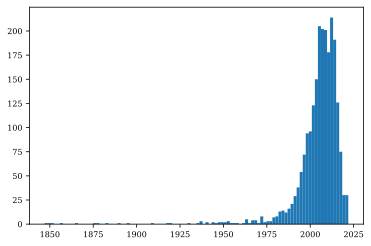

In [16]:
plt.hist(litD,bins=100);